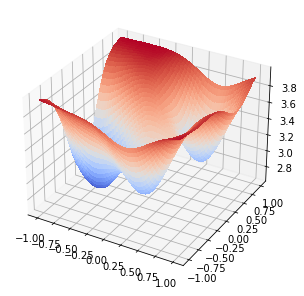

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import matplotlib.cm as cm

def func(x):
    zs = [torch.tensor([-1, 0], dtype=torch.float64), torch.tensor([0.5, 0.5], dtype=torch.float64), 
        torch.tensor([0.25, -0.5], dtype=torch.float64), torch.tensor([-0.5, -0.25], dtype=torch.float64)]
    out = 0
    for z in zs:
        out += (1 - torch.exp(-5 * torch.square(torch.norm((x - z).float()))))
    return out

u, v = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

f = []
for i in range(100):
    f.append([])
    for j in range(100):
        f[i].append(func(torch.Tensor([u[i][j], v[i][j]])))
f = torch.Tensor(f)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
surf = ax.plot_surface(u, v, f, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.savefig("1.3.pdf")

In [2]:
def plot1(x, list_t):
    x = x.detach().requires_grad_()
    y = func(x)
    y.backward()
    t1, t2, f1, f2 = [], [], [], []
    for i in range(list_t[0].shape[0]):
        t = torch.Tensor([list_t[0][i]])
        low_bound = func(x - t * x.grad)
        up_bound = y - 0.01 * t * torch.square(torch.norm(x.grad))
        if low_bound <= up_bound:
            f1.append(low_bound)
            t1.append(t)
        else:
            f2.append(low_bound)
            t2.append(t)
    return torch.Tensor(f1), torch.Tensor(t1), torch.Tensor(f2), torch.Tensor(t2)

def plot2(x, list_t):
    x = x.detach().requires_grad_()
    y = func(x)
    y.backward()
    t1, t2, f1, f2 = [], [], [], []
    for i in range(list_t[0].shape[0]):
        t = torch.Tensor([list_t[0][i]])
        low_bound = func(x - t * x.grad)
        up_bound = y - 0.01 * t * torch.square(torch.norm(x.grad))

        x_2 = x - t * x.grad
        x_2 = torch.tensor([x_2[0], x_2[1]], requires_grad = True, dtype=torch.float64)
        y_2 = func(x_2)
        y_2.backward()
        
        low_bound_2 = torch.dot(x_2.grad, x.grad)
        up_bound_2 = 0.9 * torch.square(torch.norm(x.grad))
        if low_bound <= up_bound and low_bound_2 <= up_bound_2:
            f1.append(low_bound)
            t1.append(t)
        else:
            f2.append(low_bound)
            t2.append(t)
    return torch.Tensor(f1), torch.Tensor(t1), torch.Tensor(f2), torch.Tensor(t2)

def plot3(x, list_t):
    x = x.detach().requires_grad_()
    y = func(x)
    y.backward()
    t1, t2, f1, f2 = [], [], [], []
    for i in range(list_t[0].shape[0]):
        t = torch.Tensor([list_t[0][i]])
        low_bound = func(x - t * x.grad)
        up_bound = y - 0.01 * t * torch.square(torch.norm(x.grad))

        x_2 = x - t * x.grad
        x_2 = torch.tensor([x_2[0], x_2[1]], requires_grad = True, dtype=torch.float64)
        y_2 = func(x_2)
        y_2.backward()
        
        low_bound_2 = torch.norm(x_2.grad)
        up_bound_2 = 0.9 * torch.square(torch.norm(x.grad))
        if low_bound <= up_bound and low_bound_2 <= up_bound_2:
            f1.append(low_bound)
            t1.append(t)
        else:
            f2.append(low_bound)
            t2.append(t)
    return torch.Tensor(f1), torch.Tensor(t1), torch.Tensor(f2), torch.Tensor(t2)

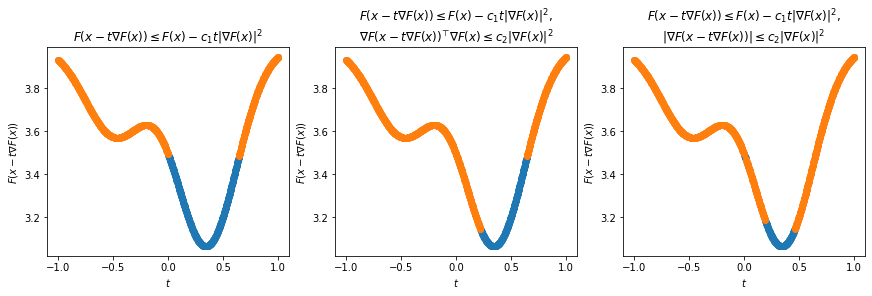

In [3]:
if __name__ == "__main__":
    x = torch.tensor([0, 0], dtype=torch.float64)
    list_t = np.meshgrid(np.linspace(-1, 1, 1000))
    f1_plt1, t1_plt1, f2_plt1, t2_plt1 = plot1(x, list_t)
    f1_plt2, t1_plt2, f2_plt2, t2_plt2 = plot2(x, list_t)
    f1_plt3, t1_plt3, f2_plt3, t2_plt3 = plot3(x, list_t)

    fig, axs = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)

    axs[0].plot(t1_plt1, f1_plt1, 'o')
    axs[0].plot(t2_plt1, f2_plt1, 'o')
    axs[0].set_xlabel(r'$t$')
    axs[0].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[0].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2$')

    axs[1].plot(t1_plt2, f1_plt2, 'o')
    axs[1].plot(t2_plt2, f2_plt2, 'o')
    axs[1].set_xlabel(r'$t$')
    axs[1].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[1].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2,$'
    "\n" r'$\nabla F(x-t\nabla F(x))^\top \nabla F(x) \leq c_2 \left|\nabla F(x)\right|^2$')

    axs[2].plot(t1_plt3, f1_plt3, 'o')
    axs[2].plot(t2_plt3, f2_plt3, 'o')
    axs[2].set_xlabel(r'$t$')
    axs[2].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[2].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2,$'
    "\n" r'$\left|\nabla F(x-t\nabla F(x))\right|\leq c_2\left|\nabla F(x)\right|^2$')
    
    plt.savefig("1.4.pdf")

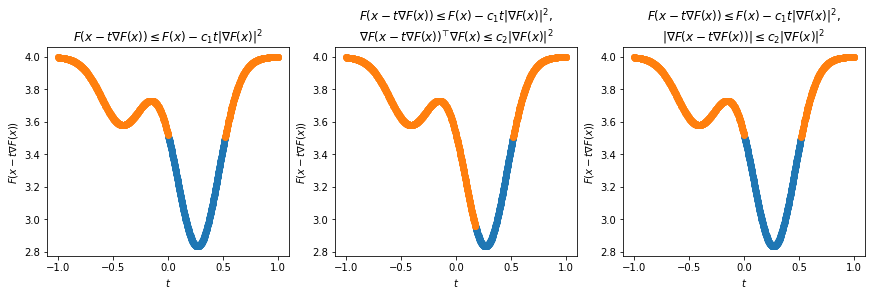

In [4]:
if __name__ == "__main__":
    x = torch.tensor([-0.2, 0.1], dtype=torch.float64)
    list_t = np.meshgrid(np.linspace(-1, 1, 1000))
    f1_plt1, t1_plt1, f2_plt1, t2_plt1 = plot1(x, list_t)
    f1_plt2, t1_plt2, f2_plt2, t2_plt2 = plot2(x, list_t)
    f1_plt3, t1_plt3, f2_plt3, t2_plt3 = plot3(x, list_t)

    fig, axs = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)

    axs[0].plot(t1_plt1, f1_plt1, 'o')
    axs[0].plot(t2_plt1, f2_plt1, 'o')
    axs[0].set_xlabel(r'$t$')
    axs[0].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[0].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2$')

    axs[1].plot(t1_plt2, f1_plt2, 'o')
    axs[1].plot(t2_plt2, f2_plt2, 'o')
    axs[1].set_xlabel(r'$t$')
    axs[1].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[1].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2,$'
    "\n" r'$\nabla F(x-t\nabla F(x))^\top \nabla F(x) \leq c_2 \left|\nabla F(x)\right|^2$')

    axs[2].plot(t1_plt3, f1_plt3, 'o')
    axs[2].plot(t2_plt3, f2_plt3, 'o')
    axs[2].set_xlabel(r'$t$')
    axs[2].set_ylabel(r'$F(x-t\nabla F(x))$')
    axs[2].set_title(r'$F(x-t\nabla F(x)) \leq F(x) - c_1 t \left|\nabla F(x)\right|^2,$'
    "\n" r'$\left|\nabla F(x-t\nabla F(x))\right|\leq c_2\left|\nabla F(x)\right|^2$')

    plt.savefig("1.5.pdf")